<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/Titanic_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of 'Survived'

In [160]:
import pandas as pd


In [161]:
data = pd.read_csv('https://raw.githubusercontent.com/Saheer7/Titanic/master/train.csv')
data.shape

(891, 12)

## EDA and dealing with missing values

In [162]:
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [164]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [165]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [166]:
from statistics import mode
mode = mode(df['Embarked'])
df['Embarked'].fillna(mode, inplace = True)
df.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [167]:
listaNAN = df[df['Age'].isna()].index
df[df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [168]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 4 )
df[['Pclass', 'SibSp', 'Parch', 'Fare','Age']] = knn.fit_transform(df[['Pclass', 'SibSp', 'Parch', 'Fare','Age']])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [169]:
df.loc[listaNAN]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3.0,male,26.000,0.0,0.0,8.4583,Q
17,1,2.0,male,28.500,0.0,0.0,13.0000,S
19,1,3.0,female,28.875,0.0,0.0,7.2250,C
26,0,3.0,male,28.875,0.0,0.0,7.2250,C
28,1,3.0,female,26.750,0.0,0.0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3.0,male,23.875,0.0,0.0,7.2292,C
863,0,3.0,female,36.750,8.0,2.0,69.5500,S
868,0,3.0,male,24.250,0.0,0.0,9.5000,S
878,0,3.0,male,24.500,0.0,0.0,7.8958,S


## Encoding and model building

I'm going to use a LogisticRegression binary classification model. So only numerical values are accepted. Firstly, I'm going to try to predict with the numerical columns. After that i will do the same but encoding the categorical values and adding them to the model.

In [170]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1,1.0,female,38.0,1.0,0.0,71.2833,C
2,1,3.0,female,26.0,0.0,0.0,7.9250,S
3,1,1.0,female,35.0,1.0,0.0,53.1000,S
4,0,3.0,male,35.0,0.0,0.0,8.0500,S


### Only numerical

In [171]:
d1 = df.copy()
d1.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
X = d1.drop('Survived', axis = 1)
y = d1['Survived']
(X.shape, y.shape)

((891, 5), (891,))

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=123)
((X_train.shape, y_train.shape),(X_test.shape, y_test.shape))

(((668, 5), (668,)), ((223, 5), (223,)))

In [173]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()
lrg.fit(X_train, y_train)
y_pred= lrg.predict(X_test)

In [174]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118  21]
 [ 40  44]]


In [175]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('The accuracy is: {}'.format(acc))


The accuracy is: 0.726457399103139


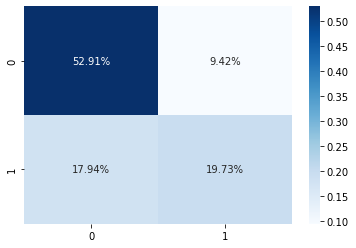

In [176]:
import seaborn as sns
import numpy as np

sns.heatmap(cm/np.sum(cm), annot = True,fmt='.2%', cmap = 'Blues')

Instead of plotting the cofusion matrix, Cross Validation can be used

In [182]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(lrg, X,y, cv = 5 , scoring = 'accuracy').mean()
print('Cross validation accuracy with 5 folds and 5 features: {}'.format(cv_acc))

Cross validation accuracy with 5 folds and 5 features: 0.6970309459544285


### Numerical and encoded(categorical)

In [191]:
d2 = df.copy()
d2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1,1.0,female,38.0,1.0,0.0,71.2833,C
2,1,3.0,female,26.0,0.0,0.0,7.9250,S
3,1,1.0,female,35.0,1.0,0.0,53.1000,S
4,0,3.0,male,35.0,0.0,0.0,8.0500,S


In [192]:
X = d2.drop('Survived', axis = 1)
y = d2['Survived']
(X.shape, y.shape)

((891, 7), (891,))

In [205]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
        remainder = 'passthrough')
lreg = LogisticRegression()

In [208]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(column_trans,ss, lreg)

In [207]:
cv_acc2 = cross_val_score(pipe,X,y,cv= 5, scoring='accuracy').mean()
print('Cross validation accuracy with 5 folds and 7 features: {}'.format(cv_acc2))

Cross validation accuracy with 5 folds and 7 features: 0.7946268281965979


## Predict "unseen" data

In [210]:
unseen = X.sample(10, random_state = 123)
unseen

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
172,3.0,female,1.000,1.0,1.0,11.1333,S
524,3.0,male,23.875,0.0,0.0,7.2292,C
452,1.0,male,30.000,0.0,0.0,27.7500,C
170,1.0,male,61.000,0.0,0.0,33.5000,S
620,3.0,male,27.000,1.0,0.0,14.4542,C
397,2.0,male,46.000,0.0,0.0,26.0000,S
161,2.0,female,40.000,0.0,0.0,15.7500,S
41,2.0,female,27.000,1.0,0.0,21.0000,S
702,3.0,female,18.000,0.0,1.0,14.4542,C
567,3.0,female,29.000,0.0,4.0,21.0750,S


In [213]:
pipe.fit(X,y)
y_pred = pipe.predict(unseen)

In [224]:
pd.DataFrame(y_pred)

final_prediction_dataFrame = pd.concat([unseen.reset_index(), pd.DataFrame(y_pred)], axis = 1)
final_prediction_dataFrame.rename(columns = {0:'Predicted survived'}, inplace = True)

final_prediction_dataFrame

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted survived
0,172,3.0,female,1.000,1.0,1.0,11.1333,S,1
1,524,3.0,male,23.875,0.0,0.0,7.2292,C,0
2,452,1.0,male,30.000,0.0,0.0,27.7500,C,1
3,170,1.0,male,61.000,0.0,0.0,33.5000,S,0
4,620,3.0,male,27.000,1.0,0.0,14.4542,C,0
5,397,2.0,male,46.000,0.0,0.0,26.0000,S,0
6,161,2.0,female,40.000,0.0,0.0,15.7500,S,1
7,41,2.0,female,27.000,1.0,0.0,21.0000,S,1
8,702,3.0,female,18.000,0.0,1.0,14.4542,C,1
9,567,3.0,female,29.000,0.0,4.0,21.0750,S,1
